#Shruti Jawale - Decision Tree

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import libraries

In [2]:
import math
import sklearn
import csv
import sys
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

##Set up the dataset

###One Hot Encoding

In [3]:
global amazondata, features, upsampleddata
#inputDataset = input("enter the full path from current directory to the input dataset file:\n")
amazondata = pd.read_csv("/content/drive/MyDrive/CS235/processedFile.csv")   #inputDataset)  #processedFile.csv

categories = pd.get_dummies(amazondata[['category']])
features = ['stars', 'reviews', 'price', 'listPrice', 'boughtInLastMonth'] + list(categories.columns)

amazondata = amazondata.drop(amazondata.columns[[0,1,6]], axis=1)
amazondata = amazondata[['isBestSeller', 'stars', 'reviews', 'price', 'listPrice', 'boughtInLastMonth']]
amazondata = pd.concat([amazondata, categories], axis=1)

amazondata.head()

,isBestSeller,stars,reviews,price,listPrice,boughtInLastMonth,category_Abrasive & Finishing Products,category_Accessories & Supplies,category_Additive Manufacturing Products,category_Arts & Crafts Supplies,...,category_Women's Accessories,category_Women's Clothing,category_Women's Handbags,category_Women's Jewelry,category_Women's Shoes,category_Women's Watches,"category_Xbox 360 Games, Consoles & Accessories","category_Xbox One Games, Consoles & Accessories","category_Xbox Series X & S Consoles, Games & Accessories",category_eBook Readers & Accessories
0,False,4.5,0,139.99,0.00,2000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,4.5,0,169.99,209.99,1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,4.6,0,365.49,429.99,300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,4.6,0,291.59,354.37,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,4.5,0,174.99,309.99,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Training the data

###Separating true and false data

In [4]:
datatrue = amazondata[amazondata.isBestSeller == True]
datafalse = amazondata[amazondata.isBestSeller == False]
print(datatrue.shape, datafalse.shape)

(8520, 254) (1417817, 254)


###Splitting the data into training, validation, and test data

In [ ]:
#split into main training and test sets with the test set being 85 instances of each class.
test = pd.concat([datatrue[:85], datafalse[:85]], axis=0)                   #each class in test has 1 percent of all true class instances
train_and_val = pd.concat([datatrue[85:], datafalse[85:]], axis=0)   #each class in training is 99 percent of the number of instances in each class.

#split into actual training and validation sets.
xtrain, xval, ytrain, yval = train_test_split(train_and_val.get(features), train_and_val['isBestSeller'], test_size=0.2)
print(xtrain.shape, xval.shape, test.shape, train_and_val.shape)


#split into main training and test sets.
#xcomb, xtest, ycomb, ytest = train_test_split(amazondata.get(features), amazondata['isBestSeller'], test_size=0.2)

#split into actual training and validation sets.
#xtrain, xval, ytrain, yval = train_test_split(xcomb, ycomb, test_size=0.2)

(1140933, 253) (285234, 253) (170, 254) (1426167, 254)


###Fitting the classifier to training data

In [ ]:
classifier = DecisionTreeClassifier(random_state=0, min_samples_split=3)
print(xtrain.shape, xval.shape, test.shape, train_and_val.shape)
classifier.fit(xtrain, ytrain)                                                    #fit to training set
print("depth of tree:", classifier.get_depth(), "\nnumber of leaves:", classifier.get_n_leaves()) #, classifier.feature_importances_)

(1140933, 253) (285234, 253) (170, 254) (1426167, 254)
depth of tree: 118 
number of leaves: 13721


###info on fitted training data

(1140933, 253) (285234, 253) (170, 254) (1426167, 254) 



decision_path   (0, 0)	1
  (0, 22422)	1
  (0, 25946)	1
  (0, 25947)	1
  (0, 25948)	1
  (0, 26684)	1
  (0, 26685)	1
  (0, 26686)	1
  (0, 26687)	1
  (0, 26707)	1
  (0, 26708)	1
  (0, 26709)	1
  (0, 26710)	1
  (0, 26711)	1
  (0, 26845)	1
  (0, 26881)	1
  (0, 26882)	1
  (0, 26883)	1
  (0, 26884)	1
  (0, 26885)	1
  (0, 26886)	1
  (0, 26887)	1
  (0, 26897)	1
  (0, 26898)	1
  (0, 26899)	1
  :	:
  (169, 1951)	1
  (169, 1952)	1
  (169, 1953)	1
  (169, 1954)	1
  (169, 1955)	1
  (169, 1956)	1
  (169, 1957)	1
  (169, 1958)	1
  (169, 1986)	1
  (169, 1987)	1
  (169, 1988)	1
  (169, 1989)	1
  (169, 1990)	1
  (169, 1991)	1
  (169, 1992)	1
  (169, 1993)	1
  (169, 1994)	1
  (169, 1995)	1
  (169, 1996)	1
  (169, 1997)	1
  (169, 1998)	1
  (169, 1999)	1
  (169, 2000)	1
  (169, 2001)	1
  (169, 2002)	1
feature_importances_: [1.38519193e-01 7.34064635e-02 4.09615297e-01 1.57873668e-01
 1.03449447e-01 8.62155060e-05 8.05470757e-04 6.32467378e-05
 1.353

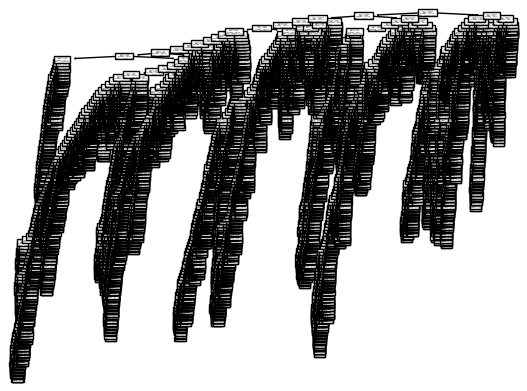

In [ ]:
print(xtrain.shape, xval.shape, test.shape, train_and_val.shape, "\n")

print("\n\ndecision_path", classifier.decision_path(test.get(features)))

print("feature_importances_:", classifier.feature_importances_)
print("\nmax_features_:", classifier.max_features_)
print("\nn_features_in_:", classifier.n_features_in_)
print("\nn_outputs_:", classifier.n_outputs_)

print("\nntree_.threshold:", classifier.tree_.threshold)
print("\ntree_.n_node_samples:", classifier.tree_.n_node_samples)
print("\ntree_.impurity:", classifier.tree_.impurity)
print("\ntree_.weighted_n_node_samples:", classifier.tree_.weighted_n_node_samples)
print("\ntree_.value:", classifier.tree_.value)

print("\nntree_:", sklearn.tree.plot_tree(classifier))

###Cross validation

In [ ]:
print(xtrain.shape, xval.shape, test.shape, train_and_val.shape)
crossvalOnVal = cross_validate(classifier, xval, yval, cv=10, return_estimator=True, scoring = ['accuracy', 'precision'])
print("test_accuracy:", crossvalOnVal['test_accuracy'])
print("test_precision:", crossvalOnVal['test_precision'])
#print(crossvalOnVal)

valorigpred = cross_val_predict(classifier, xval, yval, cv=10)                    #needs to be fit to training set
#valorigscore = cross_val_score(classifier, xval, yval, cv=10)                    #needs to be fit to training set

#testorigpred = cross_val_predict(classifier, test.get(features), test['isBestSeller'], cv=10)   #always 1 accuracy
#testorigscore = cross_val_score(classifier, test.get(features), test['isBestSeller'], cv=10)    #always 1
#print(testorigscore)

##Downsampling data and testing it

###downsampled false training and validation data

In [5]:
test = pd.concat([datatrue[:85], datafalse[:85]], axis=0)                   #each class in test has 1 percent of all true class instances
train_and_val_falsedownsampled = resample(datafalse[85:], replace = False, n_samples = 8520)

downsampleddata = pd.concat([datatrue[85:], train_and_val_falsedownsampled])
print(downsampleddata['isBestSeller'].value_counts())

False    8520
True     8435
Name: isBestSeller, dtype: int64


###cross validation on downsampled data

In [ ]:
#print(xtrain.shape, xval.shape, test.shape, train_and_val.shape, downsampleddata.shape)

crossvalOnValdownsampled = cross_validate(classifier, downsampleddata.get(features), downsampleddata['isBestSeller'], cv=10)
valdownsampledpred = cross_val_predict(classifier, downsampleddata.get(features), downsampleddata['isBestSeller'], cv=10)   #needs to be fit to training set
print("test_score:", crossvalOnValdownsampled['test_score'])

print(valdownsampledpred.shape, downsampleddata.shape)

test_score: [0.88350038 0.8892122  0.87541761 0.87530984 0.87423214 0.87820651
 0.88111662 0.88046993 0.88176331 0.87540418]
(92785,) (92785, 254)


###predicting on crossvalidated downsampled validation data

(92785,) (92785, 254)

accuracy on validation set = 0.8794632753138977
recall on validation set = [0.9544754  0.12934203]
precision on validation set = [0.91640677 0.2212533 ]

confusionmatrix on validation set=
 [[80510  3840]
 [ 7344  1091]]


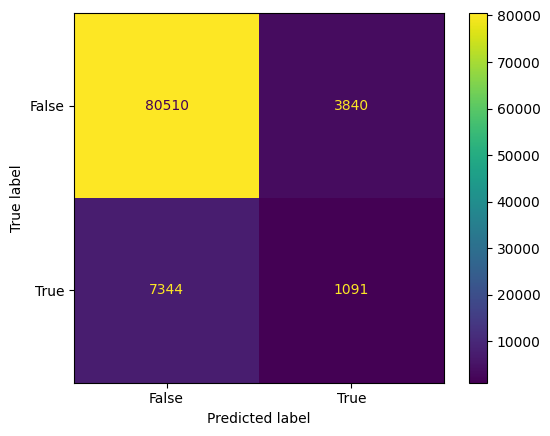

In [ ]:
print(valdownsampledpred.shape, downsampleddata.shape)
#print(xtrain.shape, xval.shape, test.shape, train_and_val.shape, downsampleddata.shape)


accuracytest = accuracy_score(downsampleddata['isBestSeller'], valdownsampledpred)
recalltest = recall_score(downsampleddata['isBestSeller'], valdownsampledpred, average=None)
precisiontest = precision_score(downsampleddata['isBestSeller'], valdownsampledpred, average=None)
print("\naccuracy on validation set =", accuracytest)
print("recall on validation set =", recalltest)
print("precision on validation set =", precisiontest)

conf = confusion_matrix(downsampleddata['isBestSeller'], valdownsampledpred)
print("\nconfusionmatrix on validation set=\n", conf)
ConfusionMatrixDisplay.from_predictions(downsampleddata['isBestSeller'], valdownsampledpred)

###Splitting the downsampled data into training, validation, and test data

In [6]:
downsampledxtrain, downsampledxval, downsampledytrain, downsampledyval = train_test_split(downsampleddata.get(features), downsampleddata['isBestSeller'], test_size=0.2)
print(downsampledxtrain.shape, downsampledxval.shape, downsampleddata.shape)

(13564, 253) (3391, 253) (16955, 254)


###Fitting the classifier to downsampled data using sklearn

In [ ]:
print(downsampledxtrain.shape, downsampledxval.shape, downsampleddata.shape)

classifier = DecisionTreeClassifier(random_state=0)
print(classifier)

#classifier.fit(downsampledxtrain.get(features), downsampledytrain)                                                    #fit to training set
#print("depth of tree:", classifier.get_depth(), "\nnumber of leaves:", classifier.get_n_leaves()) #, classifier.feature_importances_)

(74228, 253) (18557, 253) (92785, 254)
DecisionTreeClassifier(random_state=0)


###Define my decision tree

In [7]:
#print(downsampledxtrain.columns)
print(downsampledytrain)

downsampledxtrain.head()

1389056    False
1019703     True
534421      True
316568     False
1092623    False
           ...  
969586     False
376519     False
1406244    False
1385174     True
741468     False
Name: isBestSeller, Length: 13564, dtype: bool


,stars,reviews,price,listPrice,boughtInLastMonth,category_Abrasive & Finishing Products,category_Accessories & Supplies,category_Additive Manufacturing Products,category_Arts & Crafts Supplies,"category_Arts, Crafts & Sewing Storage",...,category_Women's Accessories,category_Women's Clothing,category_Women's Handbags,category_Women's Jewelry,category_Women's Shoes,category_Women's Watches,"category_Xbox 360 Games, Consoles & Accessories","category_Xbox One Games, Consoles & Accessories","category_Xbox Series X & S Consoles, Games & Accessories",category_eBook Readers & Accessories
1389056,4.7,0,23.97,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019703,4.8,0,25.95,0.0,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
534421,4.5,0,12.87,0.0,5000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316568,4.2,14,14.99,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1092623,4.0,38,3.69,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
class Node():
  def __init__(self, parent=None):
    self.parent = parent
    self.left = None        #Node
    self.right = None       #Node
    self.indices = list()
    self.numTrue = 0
    self.numFalse = 0
    self.chosenfeature = '' #string
    #self.data = list()
    self.weightedginiindex = 1
    self.mean = 0.5
    self.nclass = False

  def findDepth(self):
    n = self
    cnt = 0
    while n.parent is not None: #all nodes that are not parent. when n is root, cnt=0
      n = n.parent
      cnt += 1
    return cnt

  def setIndices(self, indices):
    self.indices = indices

  def setMean(self, mean):
    self.mean  = mean

  def setClass(self, nclass):
    self.nclass = nclass

  def setFeature(self, chosenfeature):
    self.chosenfeature = chosenfeature

  def getIndices(self):
    return self.indices

  def getLeft(self):
    return self.left

  def getRight(self):
    return self.right

  def getMeanSplit(self):
    return self.mean

  def getFeature(self):
    return self.chosenfeature

  def createLeftChild(self, indices):
    self.left = Node(self)
    self.left.indices = indices

  def createRightChild(self, indices):
    self.right = Node(self)
    self.right.indices = indices

  def printNode(self):
    print()
    print("depth:", self.findDepth())
    #print("indices:", self.indices)
    print("num True:", self.numTrue, "  numFalse:", self.numFalse)
    print("chosenfeature:", self.chosenfeature)
    print("weightedginiindex:", self.weightedginiindex)

class Tree():
  def __init__(self):
    self.root = Node()

  def setRoot(self, node):
    self.root = node

def findMeanList(List):
  meanList = list()
  for ind in range(len(List.index)-1):
    #print(List.loc[List.index[ind]])
    meanList.append((List.loc[List.index[ind]]+ List.loc[List.index[ind+1]]) / 2)
  return meanList

In [27]:
class myDecisionTreeClassifier():
  def __init__(self, random_state=None, min_impurity_decrease=0.0, min_samples_split=0, max_depth=None) :
    _random_state = random_state
    self.tree = Tree()
    self.min_impurity_decrease = int(min_impurity_decrease)
    self.min_samples_split = min_samples_split
    self.max_depth = int(max_depth)
    #(N_t / N) * (impurity - ((N_t_R / N_t) * right_impurity) - ((N_t_L / N_t) * left_impurity))
    #where N is the total number of samples,
    #N_t is the number of samples at the current node,
    #N_t_L is the number of samples in the left child, and
    #N_t_R is the number of samples in the right child.
    #N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.
    #impurityDec = (totalnumsamples / currnodenumsamples) * (wgini - )

  def calcGiniIndex(self, leftnumTrue, leftnumFalse, rightnumTrue, rightnumFalse):
    if ((leftnumTrue + leftnumFalse) == 0) or ((rightnumTrue + rightnumFalse) == 0):
      #print(leftnumTrue + leftnumFalse, rightnumTrue + rightnumFalse)
      #print("nothing in left. skipping...")
      return 1
    leftginiindex = 1 - (leftnumTrue / (leftnumTrue + leftnumFalse))**2 - (leftnumFalse / (leftnumTrue + leftnumFalse))**2
    rightginiindex = 1 - (rightnumTrue / (rightnumTrue + rightnumFalse))**2 - (rightnumFalse / (rightnumTrue + rightnumFalse))**2
    giniindex = ((leftginiindex)*(leftnumTrue+leftnumFalse))/(leftnumTrue+leftnumFalse+rightnumTrue+rightnumFalse) + ((rightginiindex)*(rightnumTrue+rightnumFalse))/(leftnumTrue+leftnumFalse+rightnumTrue+rightnumFalse)
    return giniindex

  def findNumTrue(self, Y, inds):
    if len(inds) == 0:
      return 0
    if True not in Y.loc[inds].value_counts():
      return 0
    d = Y.loc[inds].value_counts()[True]
    #print("d=", d)
    return d

  def findNumFalse(self, Y, inds):
    if len(inds) == 0:
      return 0
    if False not in Y.loc[inds].value_counts():
      return 0
    d = Y.loc[inds].value_counts()[False]
    #print("d=", d)
    return d

  def recursiveSplit(self, X, Y, testnode):   #feed the correct data
    if len(X.columns) == 0: #list
      t = self.findNumTrue(Y, testnode.getIndices())
      f = self.findNumFalse(Y, testnode.getIndices())
      testnode.setClass(t>f)
      return

    testnode.printNode()
    depth = testnode.findDepth()
    print("checking depth:", depth, self.max_depth)
    if depth >= self.max_depth:
      return
    leftinds, rightinds = self.trialSplit(X, Y, testnode)   #modifies node
    newX = X.drop([testnode.chosenfeature], axis=1)  #remove chosen column

    if len(leftinds) == 0:
      return

    print("left")
    testnode.createLeftChild(leftinds)      #set indices for left and right
    left = testnode.getLeft()
    newlX = newX.loc[left.getIndices()]
    newY = Y.loc[left.getIndices()]
    self.recursiveSplit(newlX, newY, left)

    print("right")
    testnode.createRightChild(rightinds)
    right = testnode.getLeft()
    newrX = newX.loc[right.getIndices()]
    newY = Y.loc[right.getIndices()]
    self.recursiveSplit(newrX, newY, right)

  def fit(self, X, Y):
    X = X.reset_index(drop=True)  #reindexed X and Y to make finding datapoints easier
    Y = Y.reset_index(drop=True)
    self.split(X, Y)

  def predict(self, X):   #return predictions for each datapoint
    rootnode = self.tree.root
    #go through the tree and choose the side to go based on values of each feature
    #compare based on value for eac
    for datapoint in X:   #for every datapoint
      self.recursivePredict(datapoint, rootnode)

  def recursivePredict(self, X, currtreenode):    #give it one point at a time.
    print(X)
    #if len(X.columns) == 0: #list
    #  return currtreenode.getClass()   #y value

    depth = currtreenode.findDepth()
    print(depth)

    feat = currtreenode.getFeature()
    splitvalue = currtreenode.getMeanSplit()
    testvalue = X

    if testvalue < splitvalue:
      print("go left")
      left = currtreenode.getLeft()
      return self.recursiveSplit(X, left)

    else: #testvalue >= splitvalue:
      print("go right")
      right = currtreenode.getLeft()
      return self.recursiveSplit(X, right)

  def split(self, X, Y):
    testnode = Node()
    self.tree.setRoot(testnode)

    testnode.setIndices(X.index)     #keep track of indices
    self.recursiveSplit(X, Y, testnode)

    print('root node')
    testnode.printNode()

  #continuousfeaturenames = ['stars', 'reviews', 'price', 'listPrice', 'boughtInLastMonth']
  def trialSplit(self, X, Y, testnode):     #X should have already removed the indices that are not needed. the indices for the data in X and Y cannot change after they have been set.
    leftnumTrue, leftnumFalse, rightnumTrue, rightnumFalse = 0,0,0,0
    minginiindex = 1

    bestmean = 0.5
    bestcontfeature = X.columns[0]
    bestcontleftinds, bestcontrightinds = list(), list()
    for feature in X.columns:                    #for each feature
      #sort values in the corresponding features in ascending order
      onlycontinuousfeatures = X.get([feature])
      onlycontinuousfeatures = onlycontinuousfeatures.sort_values(by=feature)
      #get the indices to match onlycontinuousfeatures

      #find the mean between each two distinct points
      meanlist = list(set(findMeanList(onlycontinuousfeatures[feature])))#.remove(0.0)    #list of unique means between each pair of distinct values in tempX[feature]
      #print("meanlist:", meanlist)

      flag = 0
      if max(meanlist) == 1.0:
        flag = 1
      #find the minginiindex and keep track of relevant indices
      leftinds = list()
      rightinds = list()
      for mean in meanlist:
        #once you have a mean, you can automatically split it once you know the two indices it sits between
        if mean == 0.0:
          continue
        if flag and mean == 1.0:
          continue
        leftinds = onlycontinuousfeatures[onlycontinuousfeatures.get(feature) < mean].index  #get the indices for the data that is greater than mean
        rightinds = onlycontinuousfeatures[onlycontinuousfeatures.get(feature) >= mean].index    #get the indices for the data that is greater than mean

        #print("len linds", len(leftinds), "  rinds", len(rightinds))
        leftnumTrue = self.findNumTrue(Y, leftinds)
        leftnumFalse = len(leftinds) - leftnumTrue
        rightnumTrue = self.findNumTrue(Y, rightinds)   #only looking at one feature
        rightnumFalse = len(rightinds) - rightnumTrue
        #print("f:", feature, "  ", leftnumTrue, leftnumFalse, rightnumTrue, rightnumFalse, "  numTrue:", rightnumTrue + leftnumTrue, "  numFalse:", rightnumFalse + leftnumFalse, "  mean", mean)

        #for each mean, find giniindex. for each feature, choose the best mean. after the feature
        giniindex = self.calcGiniIndex(leftnumTrue, leftnumFalse, rightnumTrue, rightnumFalse)
        #print(giniindex)

        if giniindex < (minginiindex - self.min_impurity_decrease): #decreases more than self.min_impurity_decrease, choose it
          print('update to', giniindex)
          minginiindex = giniindex
          bestcontfeature = feature
          print("bestfeature", bestcontfeature)
          bestmean = mean
          bestcontleftinds, bestcontrightinds =  leftinds, rightinds   #self.findIndicesForFeature(X, bestcontfeature)
        #print(feature, "  ", minginiindex,"  ", leftnumTrue, leftnumFalse, rightnumTrue, rightnumFalse, "    ", rightnumTrue + leftnumTrue, rightnumFalse + leftnumFalse)

      testnode.weightedginiindex = minginiindex
      testnode.numTrue = leftnumTrue+rightnumTrue
      testnode.numFalse = leftnumFalse+rightnumFalse
      testnode.setFeature(bestcontfeature)
      testnode.weightedginiindex = minginiindex
      testnode.setMean(bestmean)
      #print("chosenfeature:", testnode.chosenfeature)

    return bestcontleftinds, bestcontrightinds

In [ ]:
node.chosenfeature
.drop
nfeatures-1 = k


def func(featuresconsidersed, node):
  if featuresconsidersed is empty:
    reaturn
  t, l, r = trialsplit(x,y,node)
  featuresl = x.drop['name'].columns    #remove chosen column

  func(featuresl, lnode)

  trialsplit(x,y,node)
  feauturer =






func called on testnode.
func calls testsplit
func creates left and right
func calls on left and then right




In [ ]:
#for feature in downsampledxtrain.columns:
#  print(downsampledxtrain[feature])
#print(downsampledxtrain.loc[166957, 'category_Abrasive & Finishing Products'])

#print(downsampledytrain)
#datatrue = downsampledytrain.loc[437471:][downsampledytrain.loc[437471:]==True]
#print(downsampledytrain.value_counts(), "\n")

#datatrue = downsampledytrain[downsampledytrain==True]
#datafalse = downsampledytrain[downsampledytrain==False]
#print(datatrue.value_counts())
#print(datafalse.value_counts())
#print(downsampledytrain)
#print("\n", downsampledytrain.value_counts())

continuousfeatures = ['stars', 'reviews', 'price', 'listPrice', 'boughtInLastMonth',]
#tempX = downsampledxtrain.copy().get(continuousfeatures)
#print(tempX)
#tempX = tempX.sort_values(by=continuousfeatures)
#print(tempX)


#feature = 'category_Abrasive & Finishing Products'
#for ind in downsampledxtrain[feature].index:
#  if downsampledxtrain.loc[ind, feature] == 1:
#    print(downsampledxtrain.loc[ind, feature])
#print(max(downsampledxtrain[feature]))
#
#get the pandas series of all True class datapoints from downsampledytrain
#print(downsampledytrain[downsampledytrain==True].index)

#get the first boolean feature column
#onlybooleanfeatures = downsampledxtrain.drop(continuousfeatures, axis=1)
#print(onlybooleanfeatures.loc[:,onlybooleanfeatures.columns[0]])


##find mean of a continus feature
#for i in downsampledxtrain.index:
#  print(downsampledxtrain.index[0])
#feature = 'stars'
#x = downsampledxtrain.get([feature,])
#x = x.sort_values(by=feature)
#print(x)
#print(list(set(findMeanList(x[feature]))))


#given a mean and a feature, find the indices for the data in the feature that is greater than the mean
#ind = downsampledxtrain[downsampledxtrain.get('stars')>0].index
#print(len(ind), len(downsampledxtrain))
#print(ind)
#for i in ind:
#  print(downsampledxtrain.loc[i, 'stars'])

#leftinds = [1,3,5,7,9]
#data = downsampledytrain.reset_index(drop=True)
#leftclasses = [data.loc[leftinds]< .5]
#print(leftclasses)
#leftnumtrue = 0
#for i in leftinds:
#  if data.loc[i]==True:
#    leftnumtrue += 1
#print(leftnumtrue)

#print(data.value_counts()[True])

print(downsampledytrain.value_counts(), "\n")

feature = 'stars'
onlycontinuousfeatures = downsampledxtrain.get([feature,])
#print(onlycontinuousfeatures.loc[:,feature] < 4.5)
#l = onlycontinuousfeatures[onlycontinuousfeatures.get(feature) < 4.5].index
#r = onlycontinuousfeatures[onlycontinuousfeatures.get(feature) >= 4.5].index
#print(len(l), len(r))


#print(downsampledytrain.loc[:])
#inds = [897480,54427, 319565]
#d = downsampledytrain.loc[[897480,54427, 319565]]
#print()
#print(d.value_counts())
#v = d.value_counts()
#print(type(v[True]))

#print()
#print(downsampledytrain.loc[inds].value_counts()[True])



meanlist = list(set(findMeanList(onlycontinuousfeatures[feature]))).remove(0.0)


###implemented Decision Tree fitting to downsampled data

In [23]:
print(downsampledxtrain.shape, downsampledxval.shape, downsampleddata.shape, "\n")

myclassifier = myDecisionTreeClassifier(random_state = 0, min_impurity_decrease=0.001, max_depth=3) #e-5
#print(myclassifier)

print(downsampledytrain.value_counts(), "\n")
print(len(downsampledytrain.index))

myclassifier.fit(downsampledxtrain.get(features), downsampledytrain)       #fit to training set
#print("depth of tree:", classifier.get_depth(), "\nnumber of leaves:", classifier.get_n_leaves()) #, classifier.feature_importances_)

(13564, 253) (3391, 253) (16955, 254) 

False    6797
True     6767
Name: isBestSeller, dtype: int64 

13564

depth: 0
num True: 0   numFalse: 0
chosenfeature: 
weightedginiindex: 1
checking depth: 0 3
update to 0.4792553318992126
bestfeature stars
update to 0.47833657709307026
bestfeature stars
update to 0.47829654850020775
bestfeature stars
update to 0.4782565130263296
bestfeature stars
update to 0.4781764214413999
bestfeature stars
update to 0.4776551561554897
bestfeature stars
update to 0.4776150107736556
bestfeature stars
update to 0.4774543606745262
bestfeature stars
update to 0.47699906606922
bestfeature stars
update to 0.4768783052921377
bestfeature stars
update to 0.47684122200568496
bestfeature stars
update to 0.4767416720871668
bestfeature stars
update to 0.4749643826480436
bestfeature stars
update to 0.47461647627311976
bestfeature stars
update to 0.4740399511544874
bestfeature stars
update to 0.4726823356983661
bestfeature stars
update to 0.46903446281138045
bestfeature st

###info on fitted downsampled data

In [ ]:
print(downsampledxtrain.shape, downsampledxval.shape, downsampleddata.shape)

print("\n\ndecision_path", classifier.decision_path(test.get(features)))

print("feature_importances_:", classifier.feature_importances_)
print("\nmax_features_:", classifier.max_features_)
print("\nn_features_in_:", classifier.n_features_in_)
print("\nn_outputs_:", classifier.n_outputs_)

print("\nntree_.threshold:", classifier.tree_.threshold)
print("\ntree_.n_node_samples:", classifier.tree_.n_node_samples)
print("\ntree_.impurity:", classifier.tree_.impurity)
print("\ntree_.weighted_n_node_samples:", classifier.tree_.weighted_n_node_samples)
print("\ntree_.value:", classifier.tree_.value)

#print("\nntree_:", sklearn.tree.plot_tree(classifier))

###predicting on downsampled data

In [28]:
print('yes')
ypreddownsampled = myclassifier.predict(downsampledxval.get(features))
print("\ndepth of tree:", classifier.getDepth())  #, "\nnumber of leaves:", classifier.get_n_leaves())

print(downsampledxtrain.shape, downsampledxval.shape, downsampleddata.shape)

accuracytest = accuracy_score(downsampleddata['isBestSeller'], ypreddownsampled)
recalltest = recall_score(downsampleddata['isBestSeller'], ypreddownsampled, average=None)
precisiontest = precision_score(downsampleddata['isBestSeller'], ypreddownsampled, average=None)
print("\naccuracy on validation set =", accuracytest)
print("recall on validation set =", recalltest)
print("precision on validation set =", precisiontest)

conf = confusion_matrix(downsampleddata['isBestSeller'], ypreddownsampled)
print("\nconfusionmatrix on validation set=\n", conf)
ConfusionMatrixDisplay.from_predictions(downsampleddata['isBestSeller'], ypreddownsampled)

yes
stars
0


AttributeError: ignored

##Testing

###Testing on the validation data

In [ ]:
ypredval = classifier.predict(xval)
print("depth of tree:", classifier.get_depth(), "\nnumber of leaves:", classifier.get_n_leaves())

###Testing on test data

In [ ]:
ypredtest = classifier.predict(test.get(features))
print("depth of tree:", classifier.get_depth(), "\nnumber of leaves:", classifier.get_n_leaves())   #, classifier.feature_importances_)

##Check results

###Check results for validation set from cross validation

In [ ]:
print(xtrain.shape, xval.shape, test.shape, train_and_val.shape)

accuracytest = accuracy_score(yval, valorigpred)
recalltest = recall_score(yval, valorigpred, average=None)
precisiontest = precision_score(yval, valorigpred, average=None)
print("accuracy on validation set =", accuracytest)
print("recall on validation set =", recalltest)
print("precision on validation set =", precisiontest)

conf = confusion_matrix(yval, valorigpred)
print("\nconfusionmatrix on validation set=\n", conf)
ConfusionMatrixDisplay.from_predictions(yval, valorigpred)

###Check results for validation set

In [ ]:
print(xtrain.shape, xval.shape, test.shape, train_and_val.shape)

accuracytest = accuracy_score(yval, ypredval)
recalltest = recall_score(yval, ypredval, average=None)
precisiontest = precision_score(yval, ypredval, average=None)
print("accuracy on validation set =", accuracytest)
print("recall on validation set =", recalltest)
print("precision on validation set =", precisiontest)

conf = confusion_matrix(yval, ypredval)
print("\nconfusionmatrix on validation set=\n", conf)
ConfusionMatrixDisplay.from_predictions(yval, ypredval)

###Check results for testing set

In [ ]:
print(downsampledxtrain.shape, downsampledxval.shape, downsampleddata.shape)
#print(xtrain.shape, xval.shape, test.shape, train_and_val.shape)

accuracytest = accuracy_score(test['isBestSeller'], ypredtest)
recalltest = recall_score(test['isBestSeller'], ypredtest, average=None)
precisiontest = precision_score(test['isBestSeller'], ypredtest, average=None)
print("accuracy on test =", accuracytest)
print("recall on test =", recalltest)
print("precision on test =", precisiontest)

conf = confusion_matrix(test['isBestSeller'], ypredtest)
print("\nconfusionmatrix on test=\n", conf)
ConfusionMatrixDisplay.from_predictions(test['isBestSeller'], ypredtest)

Resources
* https://www.geeksforgeeks.org/gini-impurity-and-entropy-in-decision-tree-ml/
* sklearn recall, precision, confusion matrix
* https://www.dataquest.io/blog/tutorial-indexing-dataframes-in-pandas/
* https://stackoverflow.com/questions/26640145/how-do-i-get-the-name-of-the-rows-from-the-index-of-a-data-frame
* https://machinelearningmastery.com/implement-random-forest-scratch-python/
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
* https://stackoverflow.com/questions/55986094/comparing-two-lists-element-wise-in-python
* https://www.statology.org/pandas-count-specific-value-in-column/
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
* https://www.w3schools.com/python/python_howto_remove_duplicates.asp
* https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
* https://stackoverflow.com/questions/2600191/how-do-i-count-the-occurrences-of-a-list-item
* https://stackoverflow.com/questions/53415751/count-occurences-of-true-false-in-column-of-dataframe
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.empty.html
*
*